In [3]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

group_levels <- c('4 to <12 weeks', '12 to <26 weeks', '26 to <39 weeks', 
                  '39 to <52 weeks', '52 to <78 weeks', '52+ weeks', 
                  '78 to <104 weeks', '104+ weeks', 'Unknown duration')

df <-
  read_csv("data/tidy_ons_longcovid.csv", show_col_types = F)%>%
  filter(Domain == "Duration since first (suspected) coronavirus infection")%>%
  filter(Group != "Unknown duration")%>%
  filter(Unit == "Thousands")%>%
  select(`Impact on daily activity`, midpoint_date, Group, Estimate)%>%
  spread("Group", "Estimate", fill = 0)%>%
  gather("Group", "Estimate", -`Impact on daily activity`, -midpoint_date)%>%
  mutate(Group = factor(Group, levels = group_levels))%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))

df%>%
  head

Impact on daily activity,midpoint_date,Group,Estimate
<fct>,<date>,<fct>,<dbl>
Activity limited a little,2021-04-18,104+ weeks,0
Activity limited a little,2021-05-23,104+ weeks,0
Activity limited a little,2021-06-20,104+ weeks,0
Activity limited a little,2021-07-18,104+ weeks,0
Activity limited a little,2021-08-22,104+ weeks,0
Activity limited a little,2021-09-18,104+ weeks,0


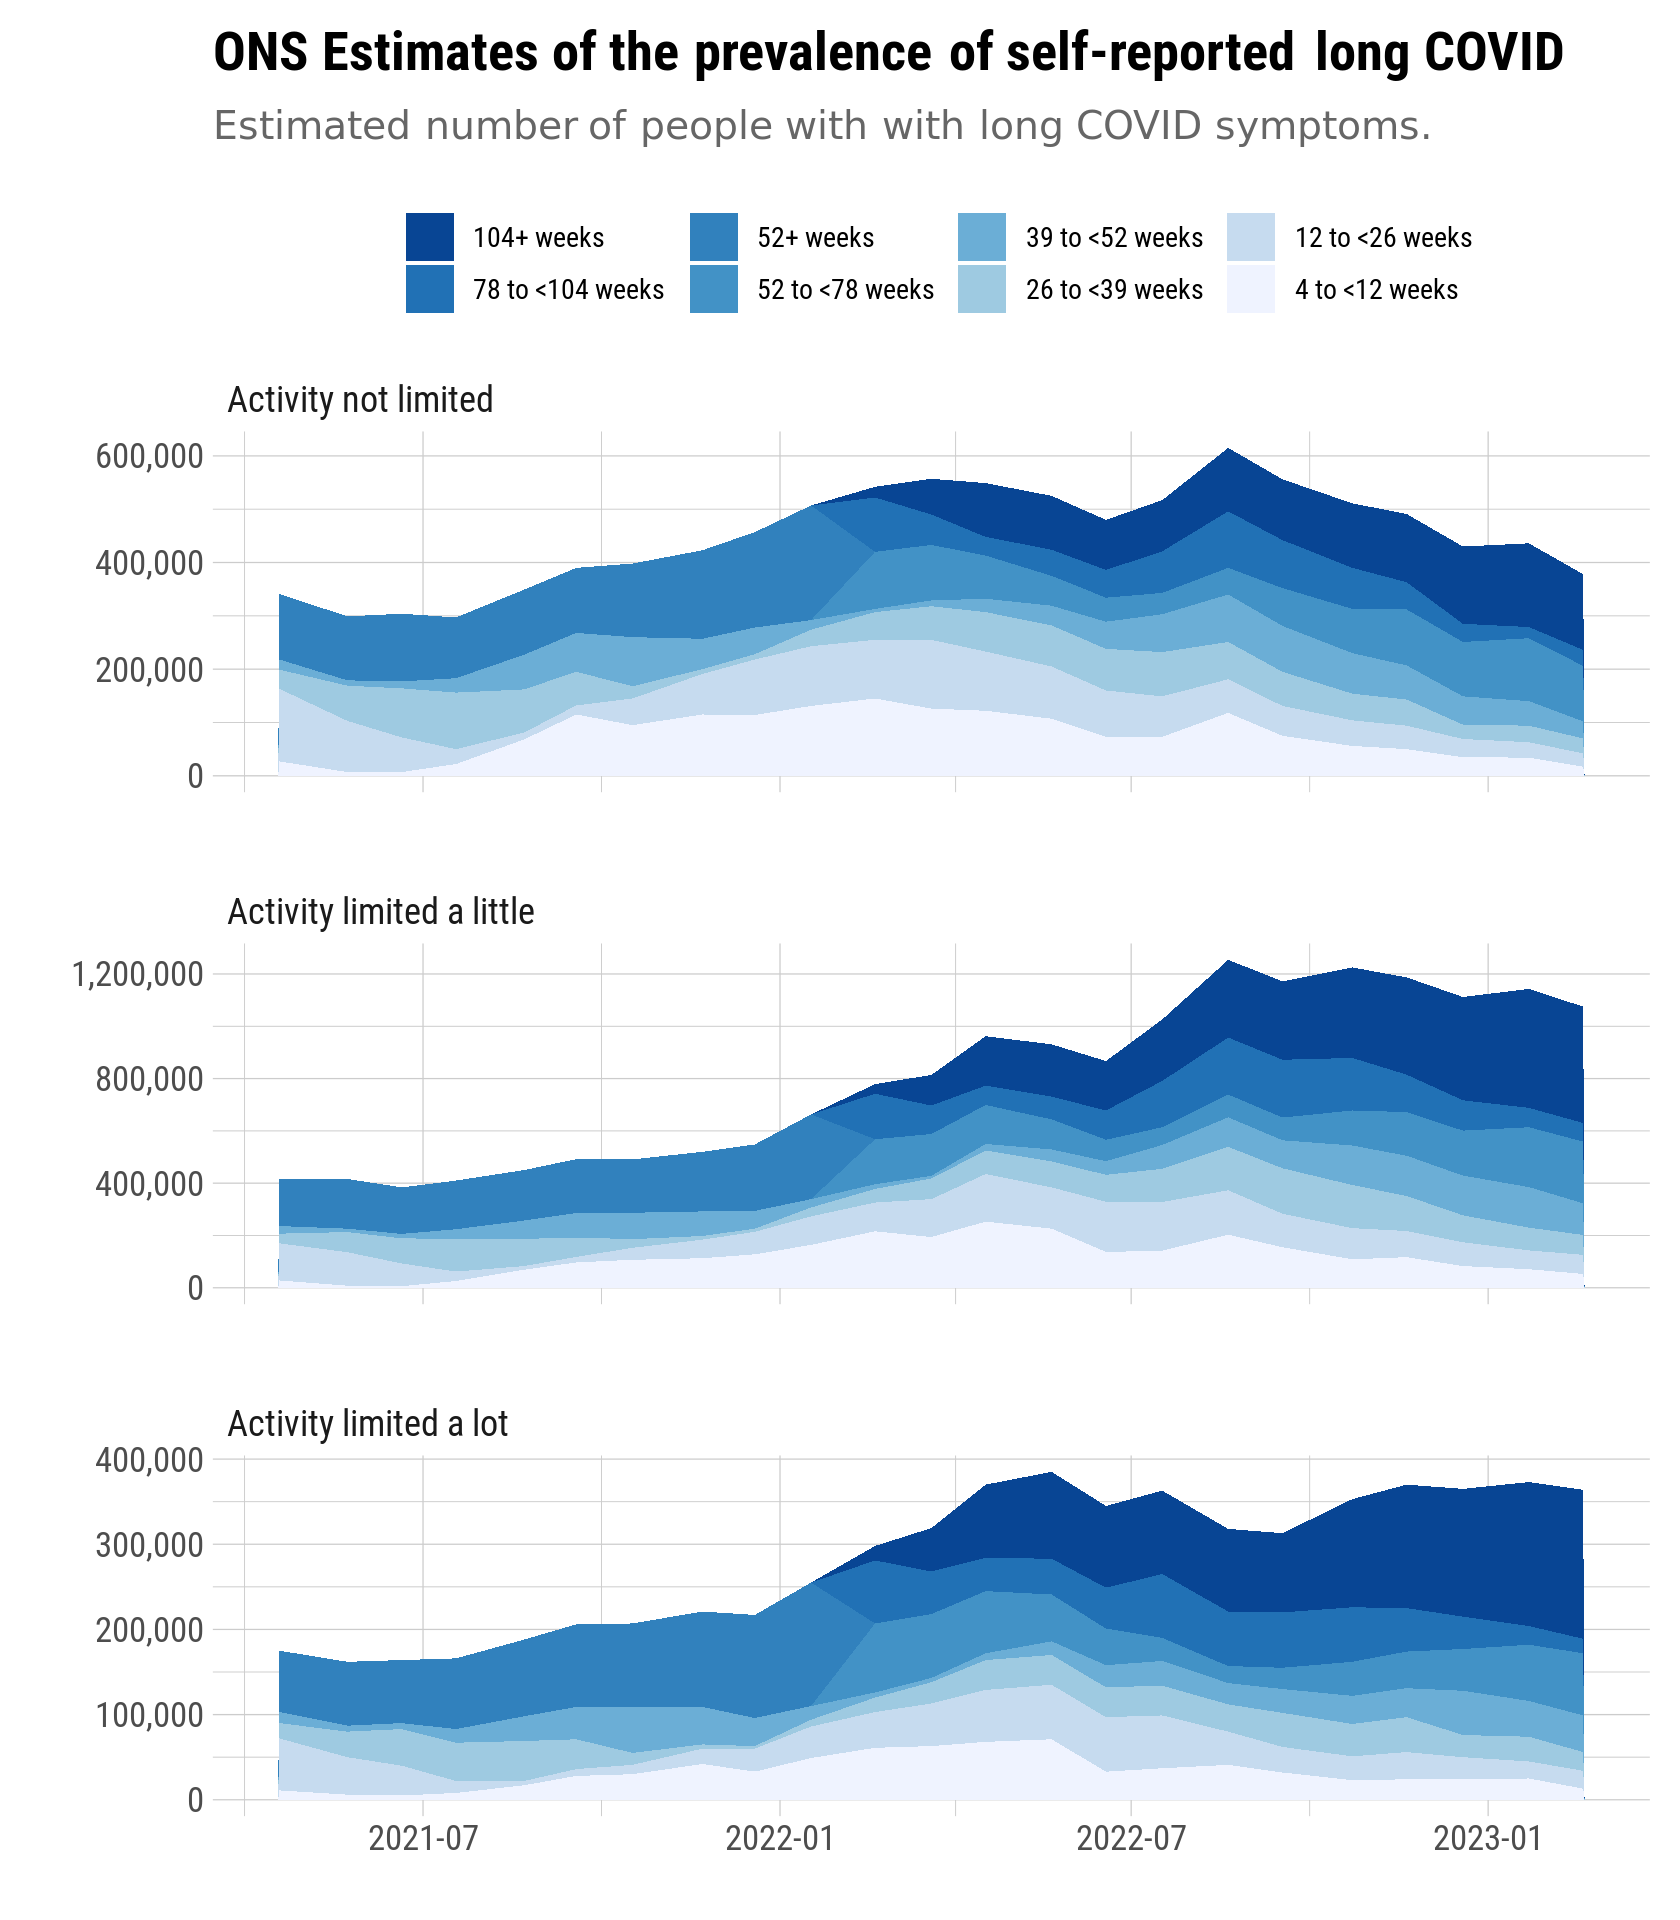

In [4]:
s = 1.1
options(repr.plot.width = s*7, repr.plot.height = s*8, repr.plot.res = 240/s)

df%>%
  mutate(Group = factor(Group, levels = rev(group_levels)))%>%
  ggplot(aes(x = midpoint_date, y = Estimate*1000, fill = Group)) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms.",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = rev(pal)) +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 1, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_estimate1")

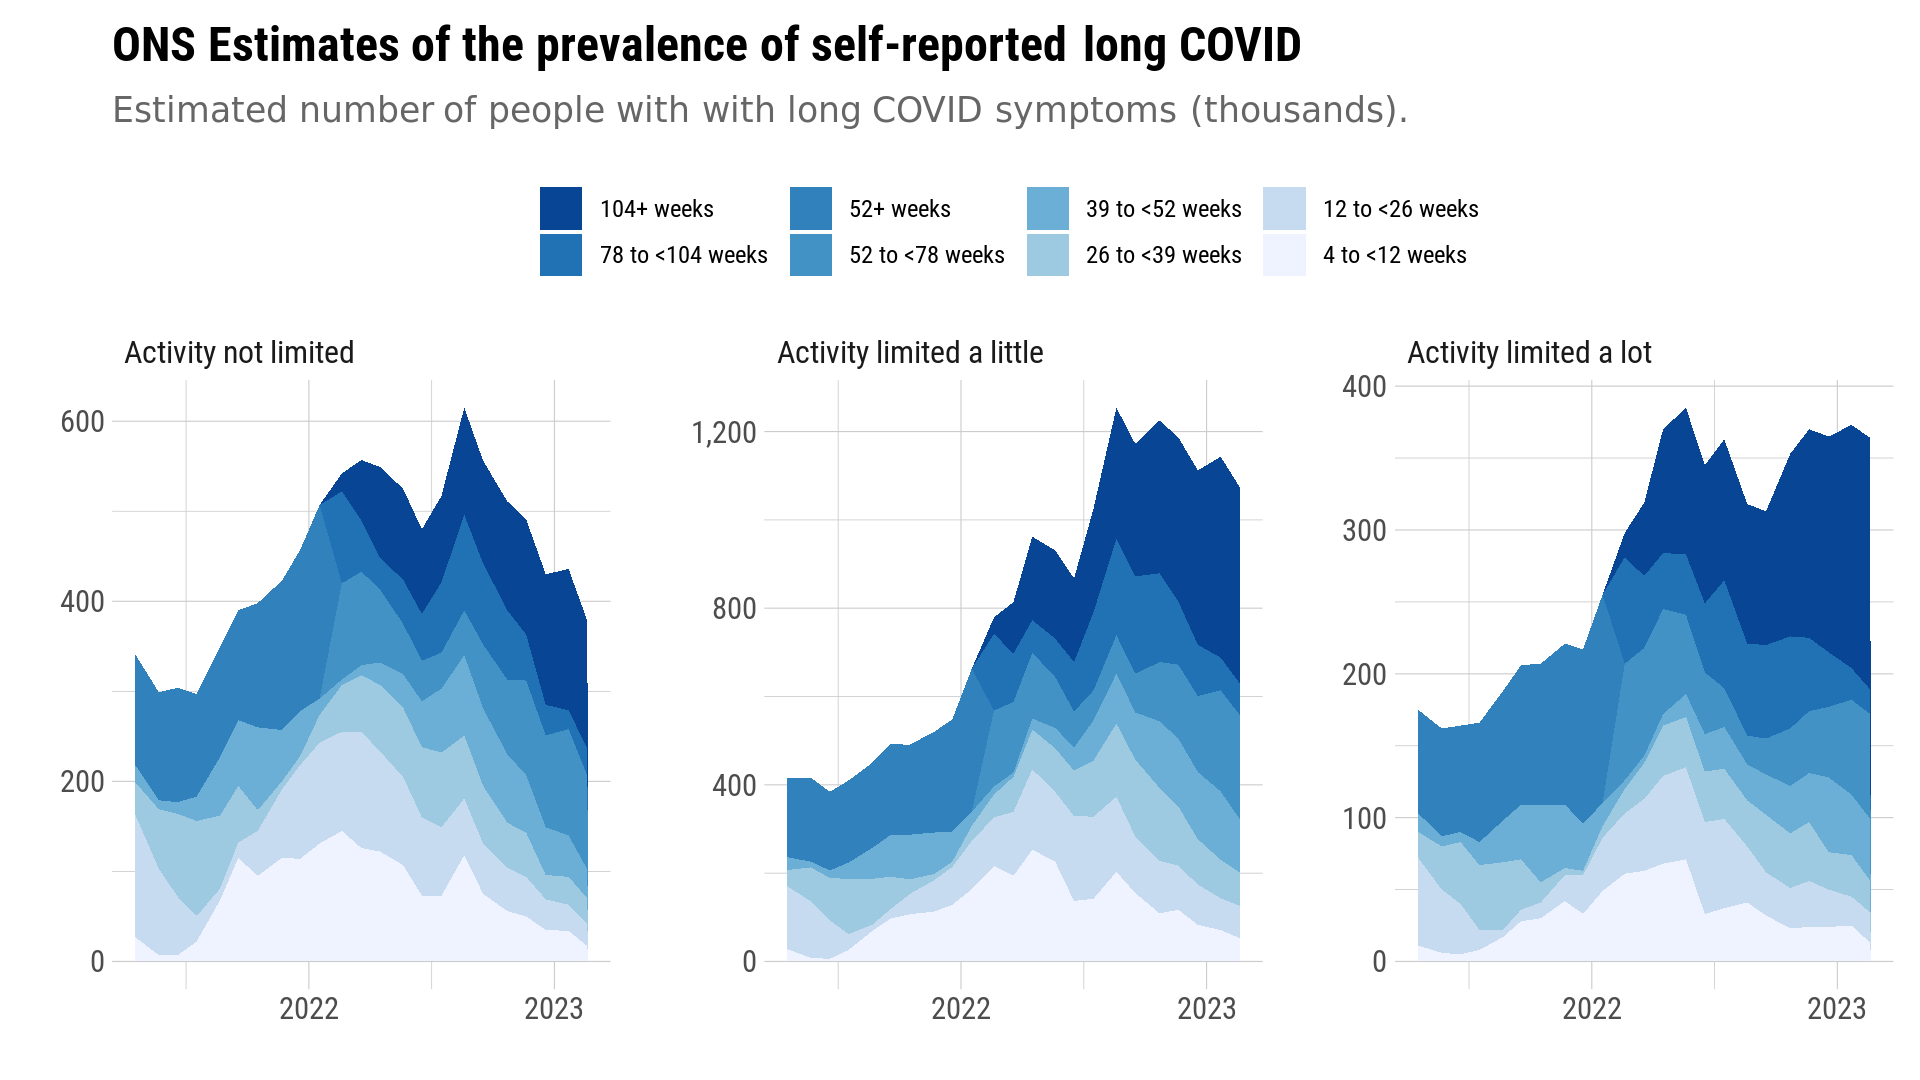

In [5]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  mutate(Group = factor(Group, levels = rev(group_levels)))%>%
  ggplot(aes(x = midpoint_date, y = Estimate, fill = Group)) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms (thousands).",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = rev(pal)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 3, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_estimate2")

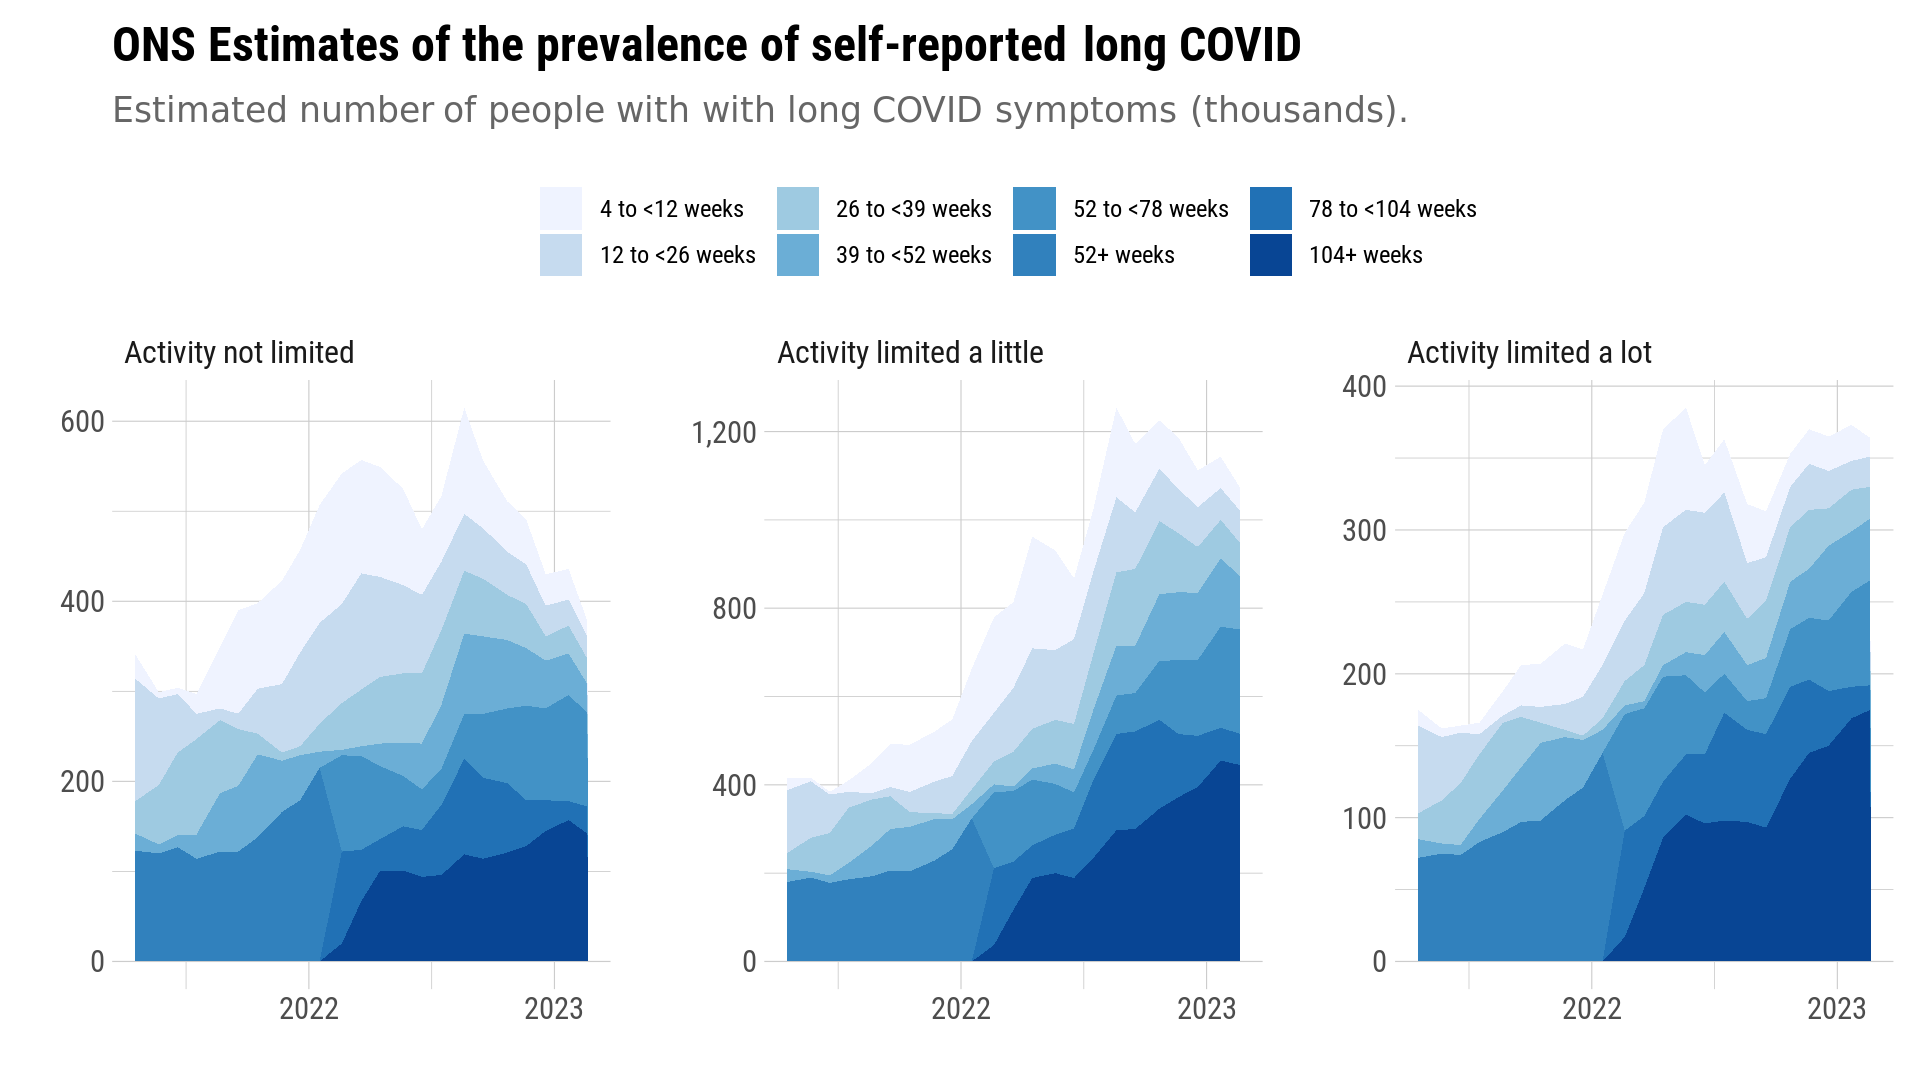

In [6]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df%>%
  mutate(Group = factor(Group, levels = group_levels))%>%
  ggplot(aes(x = midpoint_date, y = Estimate, fill = Group)) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms (thousands).",
       fill = "", x = "", y = "") +
  geom_area() +
  scale_fill_manual(values = pal) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 3, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_estimate3")